In [1]:
import os
import json
from tqdm.auto import tqdm

In [2]:
from facade_project import FACADE_LABELME_ORIGINAL_DIR, HEATMAP_LABELS, HEATMAP_TYPES_HANDLED
from facade_project.geometry.heatmap import extract_heatmaps_info


In [3]:
img_paths = [os.path.join(FACADE_LABELME_ORIGINAL_DIR, fname) for fname in sorted(os.listdir(FACADE_LABELME_ORIGINAL_DIR))]

len(img_paths)

418

# Generate

run this only to generate the heatmap infos again (careful about overwriting old ones)

In [ ]:
labelme_images_heatmaps_infos = dict()

for idx, img_path in enumerate(tqdm(img_paths)):
    json_data = json.load(open(img_path, mode='r'))
    labelme_images_heatmaps_infos[idx] = extract_heatmaps_info(json_data)

In [ ]:
#json.dump(labelme_images_heatmaps_infos, open(???, mode='w'))

# Display

In [5]:
from facade_project.show import show_channels
from facade_project.geometry.heatmap import build_heatmaps

In [6]:
info = labelme_images_heatmaps_infos[0]

In [7]:
hmaps = build_heatmaps(heatmap_info=info, labels=HEATMAP_LABELS, heatmap_types=HEATMAP_TYPES_HANDLED)

torch.Size([2052, 9224, 3])


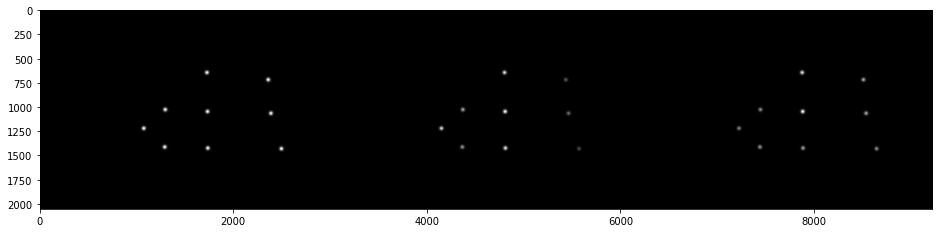

In [8]:
show_channels(hmaps)

# Tranformations

In [9]:
from facade_project.geometry.heatmap import rescale

In [10]:
info2 = rescale(info, 512)

In [11]:
hmaps2 = build_heatmaps(heatmap_info=info2, labels=HEATMAP_LABELS, heatmap_types=HEATMAP_TYPES_HANDLED)

torch.Size([345, 1544, 3])


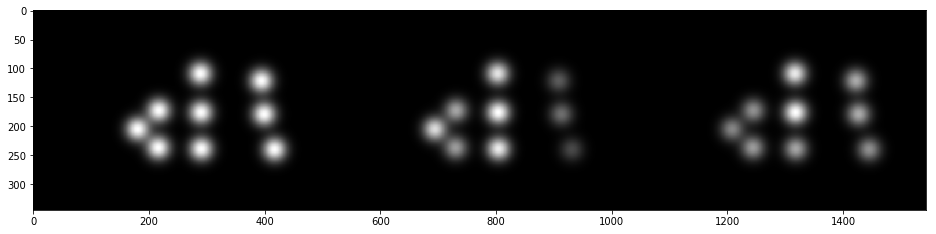

In [12]:
show_channels(hmaps2)